# Multi Layer Perceptron

## Loading the dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
import logging
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier  
from sklearn.tree import plot_tree
from keras import models, layers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

2024-10-23 17:13:28.723244: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = pd.read_csv('Data/cleaned_data.csv')

In [3]:
pd.set_option('display.max_columns', None)
df.head()

,ResponseID,ExtendedSessionID,UserID,PedPed,Barrier,CrossingSignal,AttributeLevel,ScenarioTypeStrict,NumberOfCharacters,DiffNumberOFCharacters,Saved,Country,Man,Woman,Pregnant,Stroller,OldMan,OldWoman,Boy,Girl,Homeless,LargeWoman,LargeMan,Criminal,MaleExecutive,FemaleExecutive,FemaleAthlete,MaleAthlete,FemaleDoctor,MaleDoctor,Dog,Cat,Finance_access,ICT,Industry_activity,Overall_index,Research_and_development,Skills,Total,Males,Females,Passengers,Pedestrians
0,2223Xu54ufgjcyMR3,1425316635_327833569077076.0,3.278336e+14,0,1,0,Old,Age,5,0,0,MEX,0,0,0,0,2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.60,0.55,0.80,0.60,0.5,0.40,13.60,22.05,5.45,2.5024,3.8760
1,2223jMWDEGNeszivb,-1683127088_785070916172117.0,7.850709e+14,1,0,2,More,Utilitarian,5,2,0,CHE,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0.90,0.65,0.90,0.90,0.7,0.80,2.90,4.20,1.60,0.5076,0.6237
2,222HpiEf2LtAwEg62,-1232628507_1597557389,1.597557e+09,0,1,0,Female,Gender,2,0,0,UKR,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.75,0.50,0.65,0.65,0.5,0.65,13.25,21.75,5.95,7.4120,5.6984
3,222KuWty7pNeiv77a,1654911454_3639764894860440.0,3.639765e+15,1,0,0,Low,Social Status,2,0,0,USA,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0.90,0.65,0.80,1.00,1.0,0.75,12.50,17.85,7.25,3.9603,1.9737
4,222LDp4wz24C3chzj,-1679158262_3623236506.0,3.623237e+09,0,0,0,Fat,Fitness,2,0,0,DEU,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.80,0.80,0.90,0.90,0.8,0.75,4.20,6.35,2.15,1.9120,0.6120


## Data preparation

In [4]:
# Split dataset in features and target variable
X = df.drop(columns=['Saved'])  # Features
y = df['Saved'] # Target variable

In [5]:
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size = 0.20, stratify=y, random_state = 42)
print(X_trainval.shape, X_test.shape)

(7999993, 42) (1999999, 42)


In [6]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation

In [7]:
# Change the data types to save memory
X_trainval[['ResponseID', 'ExtendedSessionID', 'UserID', 'AttributeLevel','ScenarioTypeStrict']] = X_trainval[['ResponseID', 'ExtendedSessionID', 'UserID', 'AttributeLevel','ScenarioTypeStrict']].astype(str)
X_trainval[["PedPed", "Barrier", "CrossingSignal", "NumberOfCharacters", "DiffNumberOFCharacters", "Man", "Woman", "Pregnant", "Stroller", "OldMan", "OldWoman", "Boy", "Girl", "Homeless", "LargeWoman", "LargeMan", "Criminal", "MaleExecutive", "FemaleExecutive", "FemaleAthlete", "MaleAthlete", "FemaleDoctor", "MaleDoctor", "Dog", "Cat"]] = X_trainval[["PedPed", "Barrier", "CrossingSignal", "NumberOfCharacters", "DiffNumberOFCharacters", "Man", "Woman", "Pregnant", "Stroller", "OldMan", "OldWoman", "Boy", "Girl", "Homeless", "LargeWoman", "LargeMan", "Criminal", "MaleExecutive", "FemaleExecutive", "FemaleAthlete", "MaleAthlete", "FemaleDoctor", "MaleDoctor", "Dog", "Cat"]].astype(float).round().astype('int8')
X_trainval[["Finance_access", "ICT", "Industry_activity", "Overall_index", "Research_and_development", "Skills", "Total", "Males", "Females", "Passengers", "Pedestrians"]] = X_trainval[["Finance_access", "ICT", "Industry_activity", "Overall_index", "Research_and_development", "Skills", "Total", "Males", "Females", "Passengers", "Pedestrians"]].astype('float32')

X_test[['ResponseID', 'ExtendedSessionID', 'UserID', 'AttributeLevel','ScenarioTypeStrict']] = X_test[['ResponseID', 'ExtendedSessionID', 'UserID', 'AttributeLevel','ScenarioTypeStrict']].astype(str)
X_test[["PedPed", "Barrier", "CrossingSignal", "NumberOfCharacters", "DiffNumberOFCharacters", "Man", "Woman", "Pregnant", "Stroller", "OldMan", "OldWoman", "Boy", "Girl", "Homeless", "LargeWoman", "LargeMan", "Criminal", "MaleExecutive", "FemaleExecutive", "FemaleAthlete", "MaleAthlete", "FemaleDoctor", "MaleDoctor", "Dog", "Cat"]] = X_test[["PedPed", "Barrier", "CrossingSignal", "NumberOfCharacters", "DiffNumberOFCharacters", "Man", "Woman", "Pregnant", "Stroller", "OldMan", "OldWoman", "Boy", "Girl", "Homeless", "LargeWoman", "LargeMan", "Criminal", "MaleExecutive", "FemaleExecutive", "FemaleAthlete", "MaleAthlete", "FemaleDoctor", "MaleDoctor", "Dog", "Cat"]].astype(float).round().astype('int8')
X_test[["Finance_access", "ICT", "Industry_activity", "Overall_index", "Research_and_development", "Skills", "Total", "Males", "Females", "Passengers", "Pedestrians"]] = X_test[["Finance_access", "ICT", "Industry_activity", "Overall_index", "Research_and_development", "Skills", "Total", "Males", "Females", "Passengers", "Pedestrians"]].astype('float32')

y_trainval = y_trainval.astype('int8')
y_test = y_test.astype('int8')

In [8]:
# Delete the columns 'ResponseID', ExtendedSessionID' and 'UserID' and 'Country'
X_trainval = X_trainval.drop(['ResponseID', 'ExtendedSessionID', 'UserID', 'Country'], axis=1)
X_test = X_test.drop(['ResponseID', 'ExtendedSessionID', 'UserID', 'Country'], axis=1)

In [9]:
num_cols = ['NumberOfCharacters', 'DiffNumberOFCharacters', 'Man', 'Woman', 'Pregnant', 'Stroller', 'OldMan', 'OldWoman', 'Boy', 'Girl', 'Homeless', 'LargeWoman', 'LargeMan', 'Criminal', 'MaleExecutive', 'FemaleExecutive', 'FemaleAthlete', 'MaleAthlete', 'FemaleDoctor', 'MaleDoctor', 'Dog', 'Cat', 'Finance_access', 'ICT', 'Industry_activity', 'Overall_index', 'Research_and_development', 'Skills', 'Total', 'Males', 'Females', 'Passengers', 'Pedestrians']
cat_cols = ['AttributeLevel', 'ScenarioTypeStrict', 'CrossingSignal'] #Categorical columns that shouldn't be scaled: 'CrossingSignal'
binary_cols = ['PedPed', 'Barrier']

In [10]:
# Normalize the numerical columns
scaler = StandardScaler()
X_trainval[num_cols] = scaler.fit_transform(X_trainval[num_cols])

X_test[num_cols] = scaler.transform(X_test[num_cols])

In [11]:
# Binary Logistic Regression: one-hot encode the columns 'AttributeLevel' and 'ScenarioTypeStrict' and change to integer
# Copying the datasets to prevent overwriting
X_trainval_blr = X_trainval.copy()
X_test_blr = X_test.copy()

# Specify the columns to be one-hot encoded
onehot_columns = ['AttributeLevel', 'ScenarioTypeStrict']

# Initialize the OneHotEncoder with drop='first' to avoid dummy variable trap and handle_unknown='ignore'
encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

# Fit the encoder on the training set and transform the training data
X_trainval_encoded = encoder.fit_transform(X_trainval_blr[onehot_columns])

# Transform the test set using the fitted encoder
X_test_encoded = encoder.transform(X_test_blr[onehot_columns])

# Convert the one-hot encoded arrays to DataFrames with appropriate column names
encoded_columns = encoder.get_feature_names_out(onehot_columns)
df_trainval_blr = pd.DataFrame(X_trainval_encoded, columns=encoded_columns, index=X_trainval_blr.index)
df_test_blr = pd.DataFrame(X_test_encoded, columns=encoded_columns, index=X_test_blr.index)

# Drop the original one-hot encoded columns from the original DataFrames
X_trainval_blr.drop(columns=onehot_columns, inplace=True)
X_test_blr.drop(columns=onehot_columns, inplace=True)

# Concatenate the encoded columns with the rest of the original DataFrames
X_trainval_blr = pd.concat([X_trainval_blr, df_trainval_blr], axis=1)
X_test_blr = pd.concat([X_test_blr, df_test_blr], axis=1)

# Convert all one-hot encoded columns to integer type
onehot_encoded = df_trainval_blr.columns.tolist()
X_trainval_blr[onehot_encoded] = X_trainval_blr[onehot_encoded].astype(int)
X_test_blr[onehot_encoded] = X_test_blr[onehot_encoded].astype(int)

In [12]:
# Multi Layer Perceptron: label encode the categorical columns
# Copying the datasets to prevent overwriting
X_trainval_mlp = X_trainval.copy()
X_test_mlp = X_test.copy()

# Initialize the LabelEncoder
labelencoder = LabelEncoder()

# Apply the label encoding for each categorical column separately
for col in cat_cols:
    # Fit on the training set column
    X_trainval_mlp[col] = labelencoder.fit_transform(X_trainval_mlp[col])
    
    # Transform the test set column using the same encoder
    X_test_mlp[col] = labelencoder.transform(X_test_mlp[col])

In [13]:
X_trainval_mlp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7999993 entries, 9560911 to 6748586
Data columns (total 38 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   PedPed                    int8   
 1   Barrier                   int8   
 2   CrossingSignal            int64  
 3   AttributeLevel            int64  
 4   ScenarioTypeStrict        int64  
 5   NumberOfCharacters        float32
 6   DiffNumberOFCharacters    float32
 7   Man                       float32
 8   Woman                     float32
 9   Pregnant                  float32
 10  Stroller                  float32
 11  OldMan                    float32
 12  OldWoman                  float32
 13  Boy                       float32
 14  Girl                      float32
 15  Homeless                  float32
 16  LargeWoman                float32
 17  LargeMan                  float32
 18  Criminal                  float32
 19  MaleExecutive             float32
 20  FemaleExecutive        

In [14]:
pd.set_option('display.max_columns', None)
X_trainval_blr.head()

,PedPed,Barrier,CrossingSignal,NumberOfCharacters,DiffNumberOFCharacters,Man,Woman,Pregnant,Stroller,OldMan,OldWoman,Boy,Girl,Homeless,LargeWoman,LargeMan,Criminal,MaleExecutive,FemaleExecutive,FemaleAthlete,MaleAthlete,FemaleDoctor,MaleDoctor,Dog,Cat,Finance_access,ICT,Industry_activity,Overall_index,Research_and_development,Skills,Total,Males,Females,Passengers,Pedestrians,AttributeLevel_Female,AttributeLevel_Fit,AttributeLevel_High,AttributeLevel_Hoomans,AttributeLevel_Less,AttributeLevel_Low,AttributeLevel_Male,AttributeLevel_More,AttributeLevel_Old,AttributeLevel_Pets,AttributeLevel_Rand,AttributeLevel_Young,ScenarioTypeStrict_Fitness,ScenarioTypeStrict_Gender,ScenarioTypeStrict_Random,ScenarioTypeStrict_Social Status,ScenarioTypeStrict_Species,ScenarioTypeStrict_Utilitarian
9560911,0,1,0,0.680955,-0.48336,2.858904,1.166067,-0.233518,-0.227887,-0.359004,-0.359286,-0.349827,-0.350035,-0.276757,-0.350111,1.921810,-0.227449,-0.304609,-0.305002,-0.358799,-0.358651,-0.288175,-0.288263,-0.299737,-0.299477,-0.158134,0.997064,1.252200,0.266150,0.296519,0.191499,-0.952693,-0.901704,-1.014615,-0.860289,-0.952061,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
8273351,1,0,0,0.006573,-0.48336,-0.525177,1.166067,-0.233518,-0.227887,1.579548,-0.359286,-0.349827,-0.350035,-0.276757,-0.350111,-0.350209,-0.227449,-0.304609,-0.305002,-0.358799,-0.358651,2.749912,-0.288263,-0.299737,-0.299477,0.806499,0.997064,0.062016,0.266150,0.063089,1.004092,-1.198451,-1.116885,-1.309995,-1.340899,-0.861784,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5974609,0,1,0,0.680955,-0.48336,-0.525177,-0.525297,-0.233518,3.768232,1.579548,-0.359286,1.920970,-0.350035,-0.276757,-0.350111,-0.350209,-0.227449,-0.304609,-0.305002,-0.358799,1.583111,-0.288175,-0.288263,-0.299737,-0.299477,0.806499,-0.200055,0.062016,0.995060,1.230240,0.191499,0.679138,0.512341,1.137444,0.440151,0.289654,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2380477,1,0,0,0.680955,-0.48336,-0.525177,-0.525297,-0.233518,-0.227887,-0.359004,-0.359286,-0.349827,-0.350035,10.280874,-0.350111,-0.350209,-0.227449,-0.304609,-0.305002,-0.358799,-0.358651,-0.288175,-0.288263,-0.299737,-0.299477,-1.122767,-1.796215,-1.128169,-1.191670,-0.637201,-1.433684,2.222496,2.485855,1.095247,0.856955,1.774386,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5469311,1,0,2,1.355337,-0.48336,-0.525177,-0.525297,7.592350,-0.227887,-0.359004,-0.359286,-0.349827,-0.350035,2.362651,-0.350111,-0.350209,-0.227449,5.486334,-0.305002,-0.358799,-0.358651,-0.288175,-0.288263,-0.299737,-0.299477,-0.158134,0.997064,1.252200,0.630605,-0.170341,1.004092,-1.031335,-0.987776,-1.099009,-1.157416,-1.191340,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [15]:
pd.set_option('display.max_columns', None)
X_trainval_mlp.head()

,PedPed,Barrier,CrossingSignal,AttributeLevel,ScenarioTypeStrict,NumberOfCharacters,DiffNumberOFCharacters,Man,Woman,Pregnant,Stroller,OldMan,OldWoman,Boy,Girl,Homeless,LargeWoman,LargeMan,Criminal,MaleExecutive,FemaleExecutive,FemaleAthlete,MaleAthlete,FemaleDoctor,MaleDoctor,Dog,Cat,Finance_access,ICT,Industry_activity,Overall_index,Research_and_development,Skills,Total,Males,Females,Passengers,Pedestrians
9560911,0,1,0,0,1,0.680955,-0.48336,2.858904,1.166067,-0.233518,-0.227887,-0.359004,-0.359286,-0.349827,-0.350035,-0.276757,-0.350111,1.921810,-0.227449,-0.304609,-0.305002,-0.358799,-0.358651,-0.288175,-0.288263,-0.299737,-0.299477,-0.158134,0.997064,1.252200,0.266150,0.296519,0.191499,-0.952693,-0.901704,-1.014615,-0.860289,-0.952061
8273351,1,0,0,4,5,0.006573,-0.48336,-0.525177,1.166067,-0.233518,-0.227887,1.579548,-0.359286,-0.349827,-0.350035,-0.276757,-0.350111,-0.350209,-0.227449,-0.304609,-0.305002,-0.358799,-0.358651,2.749912,-0.288263,-0.299737,-0.299477,0.806499,0.997064,0.062016,0.266150,0.063089,1.004092,-1.198451,-1.116885,-1.309995,-1.340899,-0.861784
5974609,0,1,0,4,5,0.680955,-0.48336,-0.525177,-0.525297,-0.233518,3.768232,1.579548,-0.359286,1.920970,-0.350035,-0.276757,-0.350111,-0.350209,-0.227449,-0.304609,-0.305002,-0.358799,1.583111,-0.288175,-0.288263,-0.299737,-0.299477,0.806499,-0.200055,0.062016,0.995060,1.230240,0.191499,0.679138,0.512341,1.137444,0.440151,0.289654
2380477,1,0,0,6,4,0.680955,-0.48336,-0.525177,-0.525297,-0.233518,-0.227887,-0.359004,-0.359286,-0.349827,-0.350035,10.280874,-0.350111,-0.350209,-0.227449,-0.304609,-0.305002,-0.358799,-0.358651,-0.288175,-0.288263,-0.299737,-0.299477,-1.122767,-1.796215,-1.128169,-1.191670,-0.637201,-1.433684,2.222496,2.485855,1.095247,0.856955,1.774386
5469311,1,0,2,4,5,1.355337,-0.48336,-0.525177,-0.525297,7.592350,-0.227887,-0.359004,-0.359286,-0.349827,-0.350035,2.362651,-0.350111,-0.350209,-0.227449,5.486334,-0.305002,-0.358799,-0.358651,-0.288175,-0.288263,-0.299737,-0.299477,-0.158134,0.997064,1.252200,0.630605,-0.170341,1.004092,-1.031335,-0.987776,-1.099009,-1.157416,-1.191340


## Train and evaluate the models

### Binary Logistic Regression

In [19]:
# Initialize Logistic Regression model
model = LogisticRegression()

# K-fold cross-validation setup
fold = 1
for train_index, val_index in kf.split(X_trainval_blr):
    print(f'Fold {fold}')
    
    # Splitting data for this fold
    X_train, X_val = X_trainval_blr.iloc[train_index], X_trainval_blr.iloc[val_index]
    y_train, y_val = y_trainval.iloc[train_index], y_trainval.iloc[val_index]
    
    # Fit the Logistic Regression model
    model.fit(X_train, y_train)
    
    # Predict on validation data and calculate log loss (binary cross-entropy)
    y_pred_val = model.predict(X_val)
    val_loss = log_loss(y_val, y_pred_val)
    accuracy = accuracy_score(y_val, y_pred_val)
    
    print(f"Fold {fold} validation loss: {val_loss}")
    print(f"Fold {fold} validation accuracy: {accuracy}")
    
    # Indicate that training for the current fold is done
    print(f"Training for fold {fold} completed.\n")
    
    # Increment the fold counter
    fold += 1

print("K-Fold cross-validation completed.")

Fold #1
Fold #1 Validation Loss (log_loss): 0.5947558883990336
Training for fold 1 completed.

Fold #2
Fold #2 Validation Loss (log_loss): 0.5945842191046198
Training for fold 2 completed.

Fold #3
Fold #3 Validation Loss (log_loss): 0.5943541420103884
Training for fold 3 completed.

Fold #4
Fold #4 Validation Loss (log_loss): 0.5944252266198431
Training for fold 4 completed.

Fold #5
Fold #5 Validation Loss (log_loss): 0.5951091551289025
Training for fold 5 completed.

K-Fold cross-validation completed.


### Decision Tree (CART)

In [ ]:
# Initialize Decision Tree model
model = DecisionTreeClassifier()

# K-fold cross-validation setup
fold = 1
for train_index, val_index in kf.split(X_trainval):
    print(f'Fold {fold}')
    
    # Splitting data for this fold
    X_train, X_val = X_trainval.iloc[train_index], X_trainval.iloc[val_index]
    y_train, y_val = y_trainval.iloc[train_index], y_trainval.iloc[val_index]
    
    # Fit the Decision Tree model
    model.fit(X_train, y_train)
    
    # Predict on validation data and calculate log loss (binary cross-entropy)
    y_pred_val = model.predict(X_val)
    val_loss = log_loss(y_val, y_pred_val)
    accuracy = accuracy_score(y_val, y_pred_val)
    
    print(f"Fold {fold} validation loss: {val_loss}")
    print(f"Fold {fold} validation accuracy: {accuracy}")
    
    # Indicate that training for the current fold is done
    print(f"Training for fold {fold} completed.\n")
    
    # Increment the fold counter
    fold += 1

print("K-Fold cross-validation completed.")


In [ ]:
# Plot the decision tree
# Also look at the training accuracy for the logistic regression model and the decision tree model

### MLP (Neural Network)

In [16]:
def build_model():
    model = models.Sequential()
    model.add(layers.InputLayer(shape=(X_trainval_mlp.shape[1],)))
    
    # First dense layer
    model.add(layers.Dense(64))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    
    # Second dense layer
    model.add(layers.Dense(64))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    
    # Output layer
    model.add(layers.Dense(1, activation='sigmoid'))
    
    # Compile the model
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

In [17]:
# Build the Keras model (already compiled)
model = build_model()

# Train the model with K-fold cross-validation
fold = 1
for train_index, val_index in kf.split(X_trainval_mlp):
    print(f'Fold {fold}')
    X_train, X_val = X_trainval_mlp.iloc[train_index], X_trainval_mlp.iloc[val_index]
    y_train, y_val = y_trainval.iloc[train_index], y_trainval.iloc[val_index]

    # Set up early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
    
    history = model.fit(X_train, y_train,
                        validation_data=(X_val, y_val),
                        epochs=50, batch_size=100_000, callbacks=[early_stopping], verbose=1)
    
        # Check if early stopping was triggered
    if early_stopping.stopped_epoch > 0:
        print(f"Early stopping triggered at epoch {early_stopping.stopped_epoch + 1} for fold {fold}")
        
        # Indicate that the training for the current fold is done
    print(f"Training for fold {fold} completed.\n")
        
    # Increment the fold counter
    fold += 1

print("K-Fold cross-validation completed.")

Fold #1
Epoch 1/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 34s 439ms/step - accuracy: 0.6072 - loss: 0.6628 - val_accuracy: 0.5507 - val_loss: 0.7035
Epoch 2/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 28s 423ms/step - accuracy: 0.6797 - loss: 0.6011 - val_accuracy: 0.6377 - val_loss: 0.6418
Epoch 3/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 26s 401ms/step - accuracy: 0.6950 - loss: 0.5852 - val_accuracy: 0.6715 - val_loss: 0.6192
Epoch 4/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 45s 450ms/step - accuracy: 0.7081 - loss: 0.5738 - val_accuracy: 0.6956 - val_loss: 0.5896
Epoch 5/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 30s 464ms/step - accuracy: 0.7118 - loss: 0.5690 - val_accuracy: 0.7046 - val_loss: 0.5758
Epoch 6/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 40s 454ms/step - accuracy: 0.7134 - loss: 0.5670 - val_accuracy: 0.7096 - val_loss: 0.5725
Epoch 7/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 39s 600ms/step - accuracy: 0.7142 - loss: 0.5654 - val_accuracy: 0.7122 - val_loss: 0.5687
Epoch 8/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 38s 504ms/step - accuracy: 0.7148 - loss: 0.5643 - 

KeyboardInterrupt: 

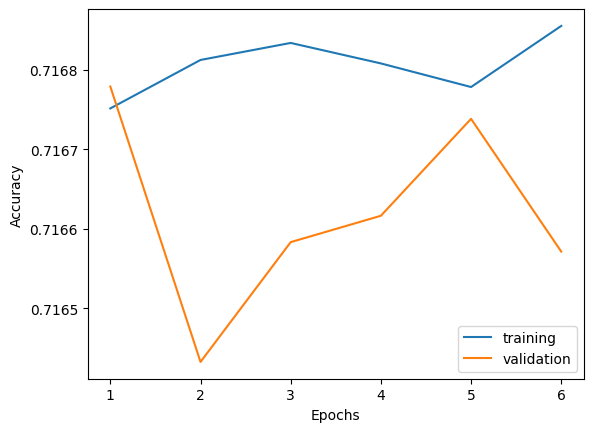

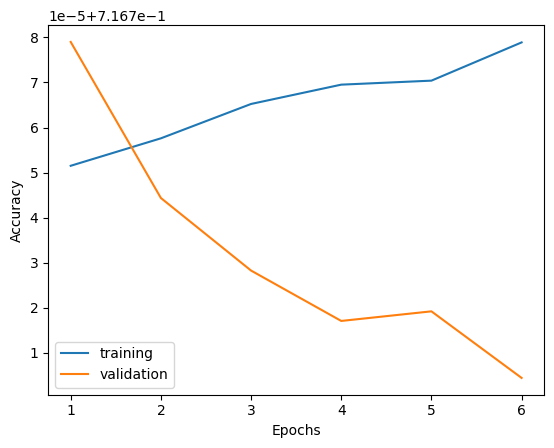

In [16]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

acc_history = history.history['accuracy']
val_acc_history = history.history['val_accuracy']

plt.plot(range(1, len(acc_history) + 1), acc_history)
plt.plot(range(1, len(val_acc_history) + 1), val_acc_history)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['training', 'validation'])
plt.show()

smooth_acc_history = smooth_curve(acc_history)
val_smooth_acc_history = smooth_curve(val_acc_history)

plt.plot(range(1, len(smooth_acc_history) + 1), smooth_acc_history)
plt.plot(range(1, len(val_smooth_acc_history) + 1), val_smooth_acc_history)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['training', 'validation'])
plt.show()

In [18]:
# Training the final model and the whole training set
model = build_model()

# Train it on the entirety of the data.
model.fit(X_trainval, y_trainval,
          epochs=50, batch_size=100_000, callbacks=[early_stopping], verbose=1)
test_loss_score, test_acc_score = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc_score)

/Users/timoklein/Library/CloudStorage/OneDrive-Personal/Universiteit/Studie/M_Data_Science_and_Society/year_2/Thesis/Code/timoklein/.venv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 16s 137ms/step - accuracy: 0.5424 - loss: 0.7333
Epoch 2/50


/Users/timoklein/Library/CloudStorage/OneDrive-Personal/Universiteit/Studie/M_Data_Science_and_Society/year_2/Thesis/Code/timoklein/.venv/lib/python3.12/site-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


80/80 ━━━━━━━━━━━━━━━━━━━━ 15s 98ms/step - accuracy: 0.6492 - loss: 0.6276
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 10s 110ms/step - accuracy: 0.6724 - loss: 0.6095
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 9s 108ms/step - accuracy: 0.6822 - loss: 0.5992
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 10s 111ms/step - accuracy: 0.6884 - loss: 0.5926
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 10s 113ms/step - accuracy: 0.6948 - loss: 0.5859
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 10s 111ms/step - accuracy: 0.7021 - loss: 0.5800
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 11s 127ms/step - accuracy: 0.7079 - loss: 0.5755
Epoch 9/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 10s 120ms/step - accuracy: 0.7107 - loss: 0.5729
Epoch 10/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 10s 110ms/step - accuracy: 0.7119 - loss: 0.5712
Epoch 11/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 10s 116ms/step - accuracy: 0.7130 - loss: 0.5696
Epoch 12/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 10s 114ms/step - accuracy: 0.7132 - loss: 0.5686
Epoch 13/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 11s 122ms/step

In [ ]:
y_pred = model.predict(X_test)
print(y_pred)
y_pred = (y_pred > 0.5)
print(y_pred)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [20]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[750531 249469]
 [319172 680827]]


0.715679357839679